In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from pprint import pprint 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('https://vincentarelbundock.github.io/''Rdatasets/csv/carData/TitanicSurvival.csv')


In [3]:
# Description of Titanic dataset
df.describe

<bound method NDFrame.describe of                            Unnamed: 0 survived     sex      age passengerClass
0       Allen, Miss. Elisabeth Walton      yes  female  29.0000            1st
1      Allison, Master. Hudson Trevor      yes    male   0.9167            1st
2        Allison, Miss. Helen Loraine       no  female   2.0000            1st
3     Allison, Mr. Hudson Joshua Crei       no    male  30.0000            1st
4     Allison, Mrs. Hudson J C (Bessi       no  female  25.0000            1st
...                               ...      ...     ...      ...            ...
1304             Zabour, Miss. Hileni       no  female  14.5000            3rd
1305            Zabour, Miss. Thamine       no  female      NaN            3rd
1306        Zakarian, Mr. Mapriededer       no    male  26.5000            3rd
1307              Zakarian, Mr. Ortin       no    male  27.0000            3rd
1308               Zimmerman, Mr. Leo       no    male  29.0000            3rd

[1309 rows x 5 co

In [4]:
#Show the first columns of the dataset
df.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


In [5]:
#Identify the label for the supervised Machine Learning
label = df["survived"]

In [6]:
df = df.drop("Unnamed: 0", axis = 1)

In [7]:
df = df.dropna(axis=0)

In [8]:
df['survived'].value_counts()

no     619
yes    427
Name: survived, dtype: int64

In [9]:
cols = df.columns.to_list()
nom_cols = df.select_dtypes(include=['object'])
for col in nom_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [10]:
def min_max_scaling(column):
    return (column - column.min())/ (column.max() - column.min())
for col in df.columns:
    df [col] = min_max_scaling (df [col])
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled,columns=df.columns)

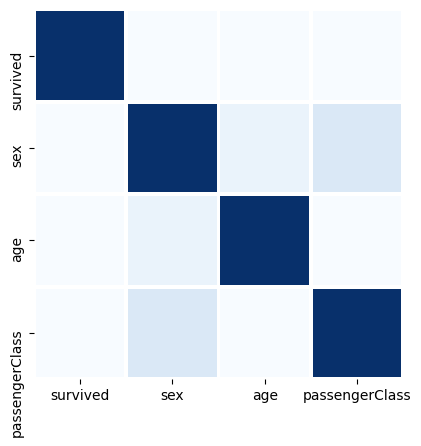

In [11]:
corr = df.corr()
corr1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')

In [12]:
y = df["survived"]
df = df.drop("survived", axis = 1)
X = df

In [13]:
SEED = 666
x_train,x_val,y_train,y_val = train_test_split(X, y, stratify = y,test_size=0.3, random_state = SEED)

In [14]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('Ada', AdaBoostClassifier()))
models.append(('Grad', GradientBoostingClassifier()))

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10)
    cv_results1 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, x_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

LR:
 ACCURACY = 0.770585, RECALL=(0.689028), PRECISION=(0.734767), ROC-AUC=(0.835801)
KNN:
 ACCURACY = 0.773214, RECALL=(0.698405), PRECISION=(0.741791), ROC-AUC=(0.832184)
SGD:
 ACCURACY = 0.721177, RECALL=(0.616129), PRECISION=(0.714882), ROC-AUC=(0.836249)
DT:
 ACCURACY = 0.799297, RECALL=(0.663349), PRECISION=(0.820915), ROC-AUC=(0.803846)
SVC:
 ACCURACY = 0.784210, RECALL=(0.522229), PRECISION=(0.919884), ROC-AUC=(0.821398)
RF:
 ACCURACY = 0.792466, RECALL=(0.690207), PRECISION=(0.773556), ROC-AUC=(0.827658)
Ada:
 ACCURACY = 0.773380, RECALL=(0.737107), PRECISION=(0.715909), ROC-AUC=(0.821151)
Grad:
 ACCURACY = 0.786949, RECALL=(0.651594), PRECISION=(0.800927), ROC-AUC=(0.848106)
